In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math, copy


In [2]:
x_train = np.array([1.0, 2.0])
y_train= np.array([300.0, 500.0])


In [12]:
def prediction(x, w, b): 
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb


In [13]:
result = prediction(x_train, 100,100)


In [14]:
result.shape

(2,)

In [56]:
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [62]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value



In [63]:
compute_cost(x_train, y_train, 100, 100)

12500.0

### gradient descent algorith to reduce the cost 

In [107]:
def compute_gradient(x, y, w, b): 
    
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [80]:
def gradient_descent(w_in, b_in, alpha, iterations, x, y):
    w = w_in
    b = b_in
    J_history = []
    p_history = []
    for i in range(iterations): 
        dj_dw, dj_db = compute_gradient(x, y, w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db 
        
        if i<100000: 
            J_history.append(compute_cost(x_train, y_train, w, b))
            p_history.append([w,b])
        if i% math.ceil(iterations/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    
    return w, b, J_history, p_history

lets see gradient descent algoriths in action. 

In [97]:
w_final, b_final, cost_history, params_history = gradient_descent(0, 0, 0.001, 10000, x_train, y_train)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 8.44e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e-01, b: 4.00000e-01
Iteration 1000: Cost 1.01e+02  dj_dw: -2.168e+01, dj_db: -1.180e+01   w:  1.841e+02, b: 1.12111e+02
Iteration 2000: Cost 1.11e+01  dj_dw: -1.343e+00, dj_db:  6.585e-01   w:  1.907e+02, b: 1.14640e+02
Iteration 3000: Cost 9.49e+00  dj_dw: -6.406e-01, dj_db:  9.877e-01   w:  1.915e+02, b: 1.13719e+02
Iteration 4000: Cost 8.20e+00  dj_dw: -5.759e-01, dj_db:  9.303e-01   w:  1.921e+02, b: 1.12758e+02
Iteration 5000: Cost 7.09e+00  dj_dw: -5.348e-01, dj_db:  8.652e-01   w:  1.927e+02, b: 1.11860e+02
Iteration 6000: Cost 6.13e+00  dj_dw: -4.971e-01, dj_db:  8.044e-01   w:  1.932e+02, b: 1.11026e+02
Iteration 7000: Cost 5.30e+00  dj_dw: -4.622e-01, dj_db:  7.478e-01   w:  1.937e+02, b: 1.10250e+02
Iteration 8000: Cost 4.58e+00  dj_dw: -4.296e-01, dj_db:  6.952e-01   w:  1.941e+02, b: 1.09529e+02
Iteration 9000: Cost 3.96e+00  dj_dw: -3.994e-01, dj_db:  6.463e-01   w:  1.945e+02, b: 1.08859e+02


In [98]:
print(len(cost_history))

10000


Text(0, 0.5, 'cost')

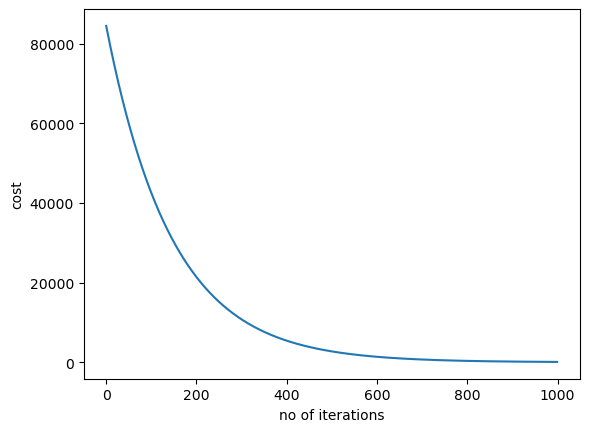

In [101]:
plt.plot(cost_history[:1000])
plt.xlabel("no of iterations")
plt.ylabel("cost")

In [102]:
print(b_final)

108.23596716021231


In [103]:
params_history[150]

[76.74744445298771, 47.17391078784691]

In [104]:
params_history[-1]

[194.9098923647605, 108.23596716021231]